<a href="https://colab.research.google.com/github/DedeYusufK/Social_Network_Analysis_for_Fraud_Transaction_detection/blob/main/Social_Network_Analysis_for_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

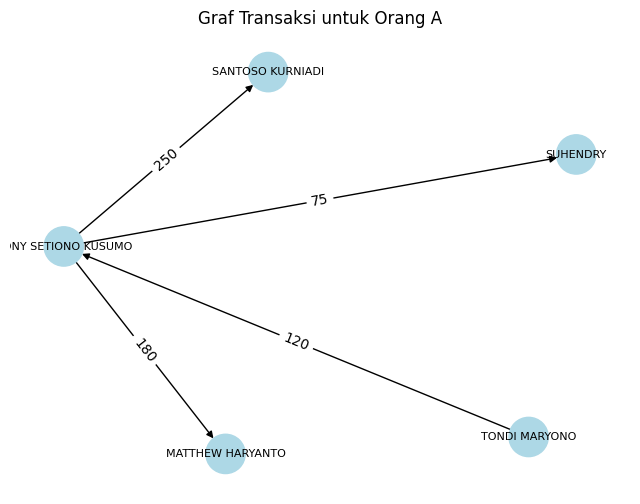

Tetangga pengirim 'TONY SETIONO KUSUMO': ['MATTHEW HARYANTO', 'SANTOSO KURNIADI', 'SUHENDRY']
Tetangga penerima 'TONY SETIONO KUSUMO': ['TONDI MARYONO']


In [ ]:
data = [
    {'pengirim': 'IRAWAN HERI PRAYITNO', 'penerima': 'MATTHEW HARYANTO', 'dana': 100, 'indikator': 'teroris'},
    {'pengirim': 'IRAWAN HERI PRAYITNO', 'penerima': 'SANTOSO KURNIADI', 'dana': 200, 'indikator': 'narkotika'},
    {'pengirim': 'MATTHEW HARYANTO', 'penerima': 'SANTOSO KURNIADI', 'dana': 150, 'indikator': 'korupsi'},
    {'pengirim': 'SANTOSO KURNIADI', 'penerima': 'SUHENDRY', 'dana': 300, 'indikator': 'teroris'},
    {'pengirim': 'SUHENDRY', 'penerima': 'IRAWAN HERI PRAYITNO', 'dana': 50, 'indikator': 'korupsi'},
    {'pengirim': 'TJANDRA MINDHARTA GOZALI', 'penerima': 'MATTHEW HARYANTO', 'dana': 75, 'indikator': 'narkotika'},
    {'pengirim': 'MATTHEW HARYANTO', 'penerima': 'TJANDRA MINDHARTA GOZALI', 'dana': 120, 'indikator': 'teroris'},
    {'pengirim': 'TOMMY BUDIANTO SETIAWAN', 'penerima': 'IRAWAN HERI PRAYITNO', 'dana': 180, 'indikator': 'korupsi'},
    {'pengirim': 'TONDI MARYONO', 'penerima': 'MATTHEW HARYANTO', 'dana': 90, 'indikator': 'narkotika'},
    {'pengirim': 'TONDI MARYONO', 'penerima': 'SANTOSO KURNIADI', 'dana': 200, 'indikator': 'teroris'},
    {'pengirim': 'SUHENDRY', 'penerima': 'TONDI MARYONO', 'dana': 150, 'indikator': 'korupsi'},
    {'pengirim': 'TJANDRA MINDHARTA GOZALI', 'penerima': 'SUHENDRY', 'dana': 75, 'indikator': 'narkotika'},
    {'pengirim': 'TONY SETIONO KUSUMO', 'penerima': 'MATTHEW HARYANTO', 'dana': 180, 'indikator': 'korupsi'},
    {'pengirim': 'TONY SETIONO KUSUMO', 'penerima': 'SANTOSO KURNIADI', 'dana': 250, 'indikator': 'teroris'},
    {'pengirim': 'TONDI MARYONO', 'penerima': 'TONY SETIONO KUSUMO', 'dana': 120, 'indikator': 'narkotika'},
    {'pengirim': 'TOMMY BUDIANTO SETIAWAN', 'penerima': 'TONDI MARYONO', 'dana': 90, 'indikator': 'teroris'},
    {'pengirim': 'ZUMIATIN MUANISAH', 'penerima': 'IRAWAN HERI PRAYITNO', 'dana': 150, 'indikator': 'korupsi'},
    {'pengirim': 'MATTHEW HARYANTO', 'penerima': 'ZUMIATIN MUANISAH', 'dana': 100, 'indikator': 'narkotika'},
    {'pengirim': 'SANTOSO KURNIADI', 'penerima': 'ZUMIATIN MUANISAH', 'dana': 200, 'indikator': 'teroris'},
    {'pengirim': 'TONY SETIONO KUSUMO', 'penerima': 'SUHENDRY', 'dana': 75, 'indikator': 'korupsi'}
]

Nama = 'TONY SETIONO KUSUMO'
# Membuat graf baru hanya dengan transaksi yang melibatkan orang A
filtered_data = [transaction for transaction in data if transaction['pengirim'] == Nama or transaction['penerima'] == Nama]
filtered_G = nx.DiGraph()
for transaction in filtered_data:
    pengirim = transaction['pengirim']
    penerima = transaction['penerima']
    dana = transaction['dana']
    indikator = transaction['indikator']
    filtered_G.add_edge(pengirim, penerima, dana=dana, indikator=indikator)

# Menampilkan graf yang hanya melibatkan orang A
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(filtered_G,k=3)
node_colors = {'teroris': 'red', 'narkotika': 'blue', 'korupsi': 'green'}
node_labels = {node: f"{node}\nIndikator: {filtered_G.nodes[node]['indikator']}" if 'indikator' in filtered_G.nodes[node] else node for node in filtered_G.nodes}
node_color_list = [node_colors[filtered_G.nodes[node]['indikator']] if 'indikator' in filtered_G.nodes[node] else 'lightblue' for node in filtered_G.nodes]
nx.draw_networkx(filtered_G, pos, with_labels=True, labels=node_labels, node_size=800, node_color=node_color_list, font_size=8)
edge_labels = nx.get_edge_attributes(filtered_G, 'dana')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels)
plt.title('Graf Transaksi untuk Orang A')
plt.axis('off')
plt.show()

# Mencari tetangga pengirim dana
pengirim = Nama
neighbors = list(filtered_G.successors(pengirim))
print(f"Tetangga pengirim '{pengirim}': {neighbors}")

# Mencari tetangga penerima dana
penerima = Nama
neighbors = list(filtered_G.predecessors(penerima))
print(f"Tetangga penerima '{penerima}': {neighbors}")

In [ ]:
# Membuat graf baru hanya dengan transaksi yang melibatkan orang
filtered_data = data[(data['NamaPEASource'] == 'DEDI DARMADI') | (data['NamaPEADestination'] == 'DEDI DARMADI')]
filtered_G = nx.DiGraph()
for _, transaction in filtered_data.iterrows():
    pengirim = transaction['NamaPEASource']
    penerima = transaction['NamaPEADestination']
    dana = transaction['nilaitransaksi']
    indikator = transaction['indikator_pelaporan']
    filtered_G.add_edge(pengirim, penerima, dana=dana, indikator=indikator)

# Menampilkan graf yang hanya melibatkan orang A
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(filtered_G)
node_colors = {'teroris': 'red', 'narkotika': 'blue', 'korupsi': 'green'}
node_labels = {node: f"{node}\nIndikator: {filtered_G.nodes[node]['indikator']}" if 'indikator' in filtered_G.nodes[node] else node for node in filtered_G.nodes}
node_color_list = [node_colors[filtered_G.nodes[node]['indikator']] if 'indikator' in filtered_G.nodes[node] else 'lightblue' for node in filtered_G.nodes]
nx.draw_networkx(filtered_G, pos, with_labels=True, labels=node_labels, node_size=800, node_color=node_color_list)
edge_labels = nx.get_edge_attributes(filtered_G, 'nilaitransaksi')
nx.draw_networkx_edge_labels(filtered_G, pos, edge_labels=edge_labels)
plt.title('Graf Transaksi untuk Orang A')
plt.axis('off')
plt.show()

# Mencari tetangga pengirim dana
pengirim = 'DEDI DARMADI'
neighbors = list(filtered_G.successors(pengirim))
print(f"Tetangga pengirim '{pengirim}': {neighbors}")

# Mencari tetangga penerima dana
penerima = 'DEDI DARMADI'
neighbors = list(filtered_G.predecessors(penerima))
print(f"Tetangga penerima '{penerima}': {neighbors}")


In [ ]:
import pandas as pd

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Membuat kolom "indikator" yang berisi ringkasan indikator untuk setiap pengirim
ringkasan_jenis = df.groupby('pengirim')['indikator'].apply(lambda x: ', '.join(x)).reset_index()
ringkasan_jenis.columns = ['pengirim', 'indikator']

# Menghitung frekuensi munculnya setiap pengirim
frekuensi = df['pengirim'].value_counts().reset_index()
frekuensi.columns = ['pengirim', 'Frekuensi']

# Menggabungkan DataFrame ringkasan_nama dan ringkasan_jenis
ringkasan = pd.merge(frekuensi, ringkasan_jenis, on='pengirim')

# Mengurutkan berdasarkan frekuensi secara menurun
ringkasan = ringkasan.sort_values(by='Frekuensi', ascending=False)

# Menampilkan 5 data paling frekuensif
top_5_frequent = ringkasan.head(5)

# Menampilkan tabel ringkasan
print("Tabel Ringkasan:")
print(top_5_frequent)


Tabel Ringkasan:
               pengirim  Frekuensi                      indikator
0      MATTHEW HARYANTO          3    korupsi, teroris, narkotika
1         TONDI MARYONO          3  narkotika, teroris, narkotika
2   TONY SETIONO KUSUMO          3      korupsi, teroris, korupsi
3  IRAWAN HERI PRAYITNO          2             teroris, narkotika
4      SANTOSO KURNIADI          2               teroris, teroris


Tabel Ringkasan:
                    pengirim  Frekuensi  Total Dana  indikator
2           MATTHEW HARYANTO          3         370    korupsi
3           MATTHEW HARYANTO          3         370    teroris
4           MATTHEW HARYANTO          3         370  narkotika
10             TONDI MARYONO          3         410  narkotika
11             TONDI MARYONO          3         410    teroris
12       TONY SETIONO KUSUMO          3         505    korupsi
13       TONY SETIONO KUSUMO          3         505    teroris
0       IRAWAN HERI PRAYITNO          2         300    teroris
1       IRAWAN HERI PRAYITNO          2         300  narkotika
5           SANTOSO KURNIADI          2         500    teroris
6                   SUHENDRY          2         200    korupsi
7   TJANDRA MINDHARTA GOZALI          2         150  narkotika
8    TOMMY BUDIANTO SETIAWAN          2         270    korupsi
9    TOMMY BUDIANTO SETIAWAN          2         270    teroris
14         ZUMIATIN MUANISAH          